In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, fbeta_score, precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier


In [125]:
df = pd.read_csv('16325569497737558.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [126]:
df=df[['age','sex','exng','caa','cp','trtbps','chol','fbs','restecg','thalachh','output']]
df.shape

(303, 11)

(array([10., 42., 67., 74., 57., 27., 13.,  8.,  3.,  2.]),
 array([ 94. , 104.6, 115.2, 125.8, 136.4, 147. , 157.6, 168.2, 178.8,
        189.4, 200. ]),
 <BarContainer object of 10 artists>)

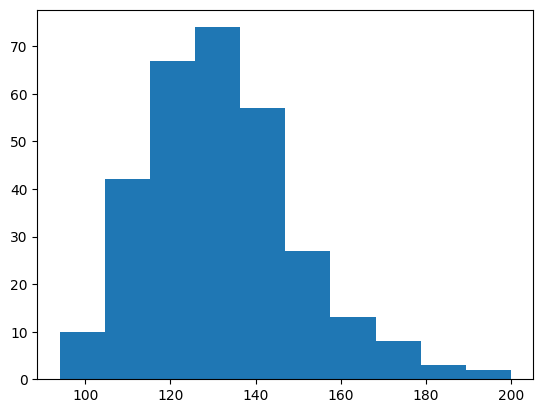

In [127]:
plt.hist(df['trtbps'])


In [128]:
df = df[df['chol']< 300]
df = df[df['thalachh'] > 80]
df = df[df['trtbps'] < 180]
len(df)


255

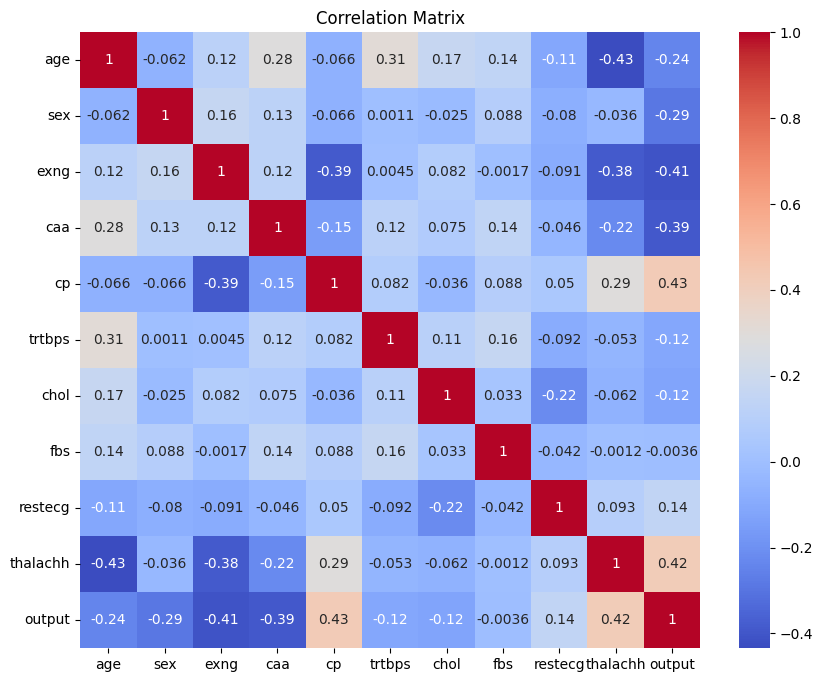

In [129]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [130]:
df['output'].value_counts()

output
1    142
0    113
Name: count, dtype: int64

In [131]:
x = df.drop('output', axis=1)
y = df['output']

In [132]:
x=np.array(x)
y=np.array(y)


In [133]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 1.0157289 ,  0.621184  , -0.68228824, ...,  2.38967075,
        -1.02073206,  0.01642226],
       [-1.86216966,  0.621184  , -0.68228824, ..., -0.41846769,
         0.92170581,  1.61378375],
       [-1.41941603, -1.60982896, -0.68228824, ..., -0.41846769,
        -1.02073206,  0.96620477],
       ...,
       [ 1.56917094,  0.621184  , -0.68228824, ...,  2.38967075,
         0.92170581, -0.37212512],
       [ 0.35159847,  0.621184  ,  1.46565622, ..., -0.41846769,
         0.92170581, -1.49459535],
       [ 0.35159847, -1.60982896, -0.68228824, ..., -0.41846769,
        -1.02073206,  1.05254863]])

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=44)
x.shape

(255, 10)

In [135]:
# ایجاد مدل درخت تصمیم‌گیری
dt = DecisionTreeClassifier(random_state=2)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2)

In [136]:
y_pred = dt.predict(x_test)

In [137]:
accuracy = dt.score(x_test, y_test)
f2 = fbeta_score(y_test, y_pred, beta=2)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [138]:
print('Accuracy:', accuracy)
print('F2 Score:', f2)
print('Precision:', precision)
print('Recall:', recall)
print(classification_report(y_test, y_pred))
print('F1 Score:', f1)

Accuracy: 0.7450980392156863
F2 Score: 0.7988165680473372
Precision: 0.8181818181818182
Recall: 0.7941176470588235
              precision    recall  f1-score   support

           0       0.61      0.65      0.63        17
           1       0.82      0.79      0.81        34

    accuracy                           0.75        51
   macro avg       0.71      0.72      0.72        51
weighted avg       0.75      0.75      0.75        51

F1 Score: 0.8059701492537313


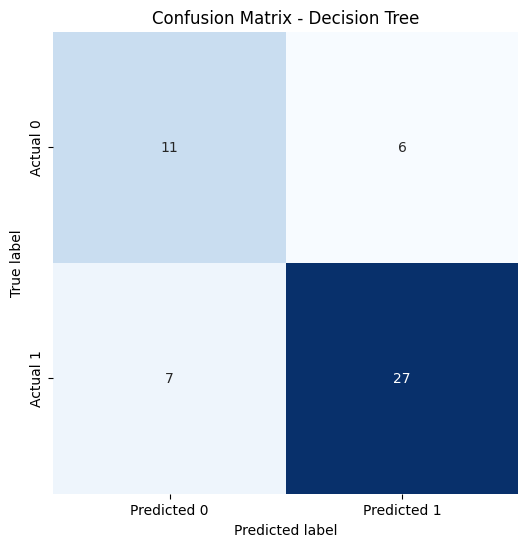

In [139]:
# رسم ماتریس درهم‌ریختگی
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Predicted 0", "Predicted 1"], 
            yticklabels=["Actual 0", "Actual 1"])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()